# MODEL SARIMA 

In [1]:
import pandas as pd
from sklearn import preprocessing 
df = pd.read_excel (r'C:/Users/Kira/Desktop/Internship/Data/Delhi_Data-20210529T043217Z-001/Delhi_Data/2013-2020-DH-DELHI-RKPURAM.xlsx')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df.shape

(2922, 41)

In [3]:
df.columns

Index(['From Date', 'To Date', 'PM2.5', 'PM1', 'NO', 'NO2', 'NOx', 'NH3',
       'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene', 'Eth-Benzene', 'MP-Xylene',
       'O Xylene', 'P-Xylene', 'Temp', 'RH', 'WS', 'WD', 'SR', 'BP', 'VWS',
       'AT', 'RF', 'Xylene', 'CH4', 'Rack Temp', 'CO2', 'NMHC', 'SPM', 'THC',
       'Gust', 'Variance', 'PP Accum', 'Power', 'Black Carbon', 'MH', 'HCHO',
       'Hg'],
      dtype='object')

In [4]:
df['From Date']= df['From Date'].str.slice(0,10)

In [5]:
df['From Date']=pd.to_datetime(df['From Date'],dayfirst=True,errors='ignore')

In [6]:
drop_list=['To Date','Benzene', 'Toluene', 'Eth-Benzene', 'MP-Xylene',
       'O Xylene', 'P-Xylene', 'Temp', 'RH', 'WS', 'WD', 'SR', 'BP', 'VWS',
       'AT', 'RF', 'Xylene', 'CH4', 'Rack Temp', 'CO2', 'NMHC', 'SPM', 'THC',
       'Gust', 'Variance', 'PP Accum', 'Power', 'Black Carbon', 'MH', 'HCHO',
       'Hg']
df.drop(drop_list,axis=1,inplace=True)

In [7]:
df

,From Date,PM2.5,PM1,NO,NO2,NOx,NH3,SO2,CO,Ozone
0,2013-01-01,462.25,NaN,NaN,15.00,NaN,NaN,23.00,121.00,4.50
1,2013-01-02,331.93,NaN,102.16,28.68,170.48,59.99,19.98,2.68,2.64
2,2013-01-03,220.60,NaN,75.22,37.13,144.90,65.49,20.55,1.66,15.93
3,2013-01-04,295.63,NaN,116.30,67.87,226.48,103.64,20.97,2.67,23.15
4,2013-01-05,245.00,NaN,51.00,52.24,119.99,101.44,20.26,1.78,24.65
...,...,...,...,...,...,...,...,...,...,...
2917,2020-12-27,305.41,405.81,95.81,48.29,103.80,32.99,14.84,1.43,55.30
2918,2020-12-28,109.66,259.31,43.32,49.96,61.89,23.18,16.58,1.76,36.04
2919,2020-12-29,148.26,283.06,32.10,52.69,54.19,30.70,13.79,1.50,38.44
2920,2020-12-30,173.56,230.41,20.06,41.84,38.61,33.41,11.59,1.57,36.52


In [8]:
df.isnull().sum(axis = 0)

From Date       0
PM2.5         966
PM1          1040
NO            937
NO2           936
NOx           934
NH3           931
SO2           977
CO            979
Ozone         967
dtype: int64

In [9]:
df = df.set_index('From Date')

In [10]:
import matplotlib.dates as mdates

In [11]:
df['Year'] = df.index.year
df['Month'] = df.index.month

In [12]:
df_2014=df.loc['2014-01-01':'2014-12-31']

In [13]:
df_2014

,PM2.5,PM1,NO,NO2,NOx,NH3,SO2,CO,Ozone,Year,Month
From Date,,,,,,,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,1
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,1
2014-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,1
2014-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,1
2014-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,1
...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,12
2014-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,12
2014-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,12


In [14]:
df_na=df.copy()
df_na=df_na.dropna()

In [15]:
data_columns = ['PM2.5', 'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone']
df_weekly = df[data_columns].resample('W').mean()
df_weekly.head(3)

,PM2.5,PM1,NO,NO2,NOx,NH3,SO2,CO,Ozone
From Date,,,,,,,,,
2013-01-06,313.601667,NaN,90.486000,45.755000,176.312,84.964000,20.941667,22.285000,21.688333
2013-01-13,242.533333,NaN,50.325000,66.931667,132.540,67.646667,19.883333,2.288333,30.510000
2013-01-20,202.485714,NaN,163.557143,61.645714,286.550,84.970000,20.425714,2.822857,14.300000


In [16]:
df_weekly_na=df_weekly.copy()
df_weekly_na=df_weekly_na.dropna()

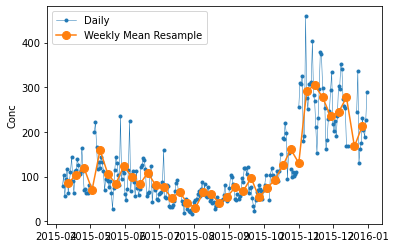

In [17]:
start, end = '2015-01', '2015-12'
fig, ax = plt.subplots()
ax.plot(df.loc[start:end, 'PM2.5'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(df_weekly.loc[start:end, 'PM2.5'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Conc')
ax.legend()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

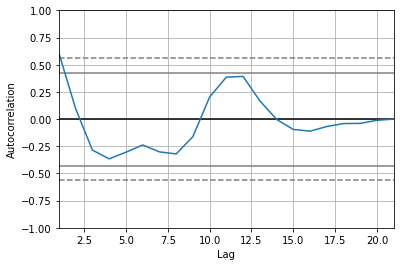

In [18]:
pd.plotting.autocorrelation_plot(df_weekly_na['2015':'2016']['PM2.5'].resample('1m').mean())

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

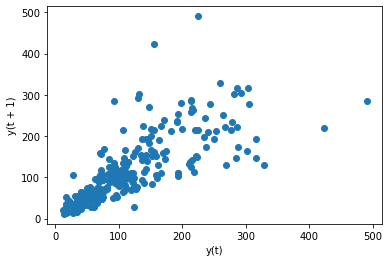

In [19]:
pd.plotting.lag_plot(df_weekly_na['PM2.5'],lag=1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

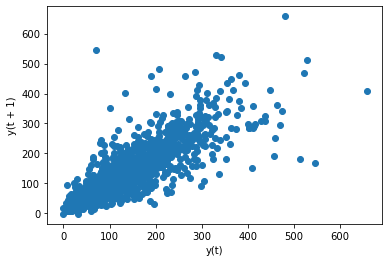

In [20]:
pd.plotting.lag_plot(df_na['PM2.5'],lag=1)

In [21]:
import statistics

## 2014

In [22]:
df_2014=df.loc['2014-01-01':'2014-12-31']

In [23]:
df_2014=df_2014.reset_index()

In [24]:
df_2014

,From Date,PM2.5,PM1,NO,NO2,NOx,NH3,SO2,CO,Ozone,Year,Month
0,2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,1
1,2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,1
2,2014-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,1
3,2014-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,1
4,2014-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2014-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,12
361,2014-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,12
362,2014-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,12
363,2014-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,12


In [25]:
for col in df.columns:
    df_2014[col]=df_2014.apply(lambda x: (df.loc[x['From Date'] + pd.offsets.DateOffset(years=+1)][col])  if pd.isna(x[col]) else x[col], axis=1)
    df_2014[col]=df_2014.apply(lambda x: (df.loc[x['From Date'] + pd.offsets.DateOffset(years=+2)][col])  if pd.isna(x[col]) else x[col], axis=1)

In [26]:
df_2014 = df_2014.set_index('From Date')
df.loc['2014-01-01':'2014-12-31']=df_2014

In [27]:
df.isnull().sum(axis = 0)

PM2.5    608
PM1      682
NO       578
NO2      577
NOx      575
NH3      572
SO2      622
CO       620
Ozone    612
Year       0
Month      0
dtype: int64

## 2013

In [28]:
df_2013=df.loc['2013-01-01':'2013-12-31']

In [29]:
df_2013=df_2013.reset_index()

In [30]:
df_2013.isnull().sum(axis = 0)

From Date      0
PM2.5        284
PM1          363
NO           281
NO2          280
NOx          281
NH3          281
SO2          280
CO           280
Ozone        280
Year           0
Month          0
dtype: int64

In [31]:
for col in df.columns:
    df_2013[col]=df_2013.apply(lambda x: (df.loc[x['From Date'] + pd.offsets.DateOffset(years=+1)][col])  if pd.isna(x[col]) else x[col], axis=1)
    df_2013[col]=df_2013.apply(lambda x: (df.loc[x['From Date'] + pd.offsets.DateOffset(years=+2)][col])  if pd.isna(x[col]) else x[col], axis=1)

In [32]:
df_2013.isnull().sum(axis = 0)

From Date    0
PM2.5        6
PM1          7
NO           5
NO2          5
NOx          5
NH3          5
SO2          6
CO           5
Ozone        6
Year         0
Month        0
dtype: int64

In [33]:
df_2013 = df_2013.set_index('From Date')

In [34]:
df.loc['2013-01-01':'2013-12-31']=df_2013

In [35]:
df.isnull().sum(axis = 0)

PM2.5    330
PM1      326
NO       302
NO2      302
NOx      299
NH3      296
SO2      348
CO       345
Ozone    338
Year       0
Month      0
dtype: int64

## 2015

In [36]:
df_2015=df.loc['2015-01-01':'2015-05-31']
df_2015=df_2015.reset_index()

In [37]:
for col in df.columns:
    df_2015[col]=df_2015.apply(lambda x: (df.loc[x['From Date'] + pd.offsets.DateOffset(years=+1)][col])  if pd.isna(x[col]) else x[col], axis=1)
    df_2015[col]=df_2015.apply(lambda x: (df.loc[x['From Date'] + pd.offsets.DateOffset(years=+2)][col])  if pd.isna(x[col]) else x[col], axis=1)

In [38]:
df_2015 = df_2015.set_index('From Date')
df.loc['2015-01-01':'2015-05-31']=df_2015

## 2017


In [39]:
df_2017=df.loc['2017-03-15':'2017-11-30']
df_2017=df_2017.reset_index()

In [40]:
for col in df.columns:
    df_2017[col]=df_2017.apply(lambda x: (df.loc[x['From Date'] + pd.offsets.DateOffset(years=+1)][col])  if pd.isna(x[col]) else x[col], axis=1)
    df_2017[col]=df_2017.apply(lambda x: (df.loc[x['From Date'] + pd.offsets.DateOffset(years=+2)][col])  if pd.isna(x[col]) else x[col], axis=1)

In [41]:
df_2017 = df_2017.set_index('From Date')
df.loc['2017-03-15':'2017-11-30']=df_2017

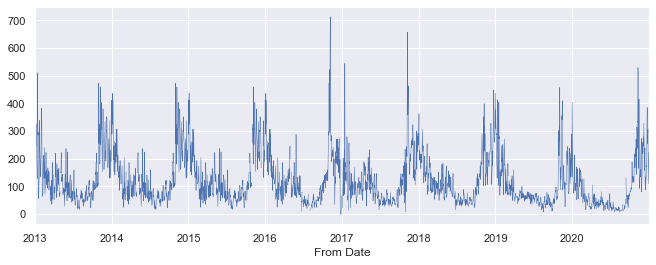

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
df['PM2.5'].plot(linewidth=0.5);

In [43]:
df.isnull().sum(axis = 0)

PM2.5    73
PM1      69
NO       51
NO2      51
NOx      48
NH3      47
SO2      98
CO       91
Ozone    87
Year      0
Month     0
dtype: int64

In [44]:
col=['PM2.5', 'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone']
df=df[col].interpolate()
df.isnull().sum(axis = 0)

PM2.5    0
PM1      0
NO       0
NO2      0
NOx      0
NH3      0
SO2      0
CO       0
Ozone    0
dtype: int64

<AxesSubplot:xlabel='From Date'>

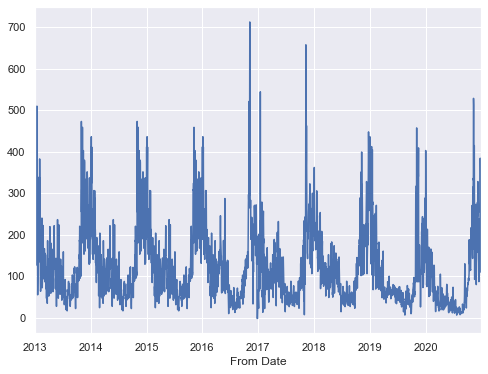

In [45]:
df['PM2.5'].plot(figsize=(8, 6))

In [46]:
df_month = df[data_columns].resample('m').mean()

In [47]:
df_month 

,PM2.5,PM1,NO,NO2,NOx,NH3,SO2,CO,Ozone
From Date,,,,,,,,,
2013-01-31,238.402581,440.016129,137.740645,72.304839,261.235161,80.999032,19.117419,6.486774,29.058065
2013-02-28,153.191071,310.870357,88.437500,81.714286,195.578929,48.129643,14.771429,1.521786,38.622143
2013-03-31,104.222419,206.323871,96.660645,61.831935,185.970000,37.589032,63.851774,1.856129,64.526452
2013-04-30,113.373167,251.067667,53.969333,66.616500,132.149833,34.069667,23.560000,2.020333,70.981000
2013-05-31,118.867419,317.449355,16.721613,87.684516,102.607419,45.086452,23.457097,2.972903,78.601613
...,...,...,...,...,...,...,...,...,...
2020-08-31,15.057097,43.481290,10.348387,23.110000,28.620323,18.224516,9.794677,0.960323,27.300968
2020-09-30,48.916667,94.895667,20.971333,43.774667,40.302667,22.230333,15.480667,0.696000,34.200333
2020-10-31,137.285161,246.180323,61.755161,58.697419,80.421935,22.039677,15.777742,1.136452,47.390000


In [48]:
file_name='RK_PURAM_MONTHLY_DATA.xlsx'
df_month.to_excel(file_name)

In [49]:
file_name='RK_PURAM_DATA_0null.xlsx'
df.to_excel(file_name)

# Model

In [50]:
feature_train=df_month.loc['2013-01-01':'2017-12-31','PM2.5']
feature_test=df_month.loc['2018-01-01':'2019-12-31','PM2.5']

In [51]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

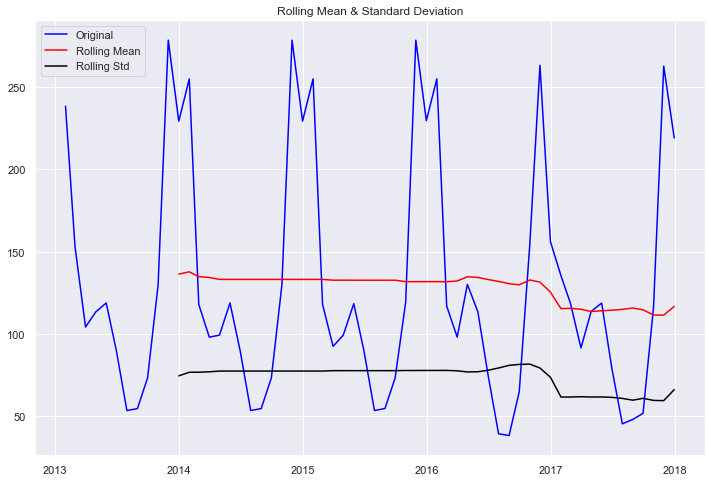

Results of Dickey-Fuller Test:
Test Statistic                 -0.471511
p-value                         0.897457
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


In [52]:
test_stationarity(feature_train)

C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


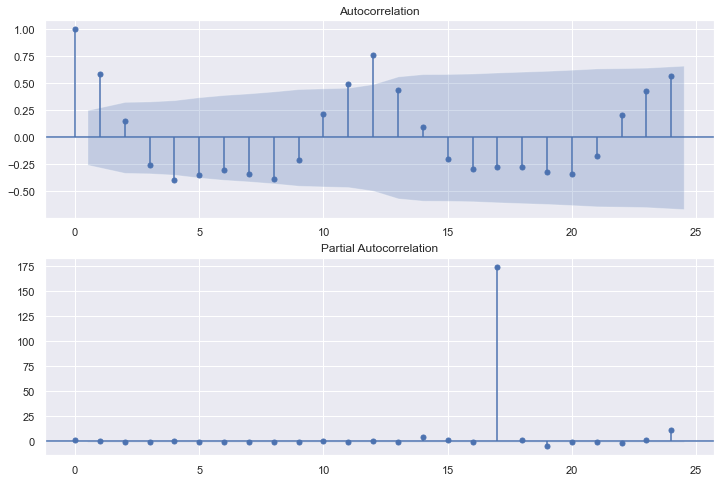

In [53]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(feature_train, lags=24, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(feature_train, lags=24, ax=ax2)

In [54]:
start=len(feature_train)
end=len(feature_train)+len(feature_test)-1

In [55]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

In [56]:
import itertools
start=len(feature_train)
end=len(feature_train)+len(feature_test)-1
p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [57]:
import numpy as np

In [58]:
rmse_val=100000
for param in pdq:
    param_seasonal_list=list(param)
    param_seasonal_list.append(12)
    param_seasonal=tuple(param_seasonal_list)
    mod = sm.tsa.statespace.SARIMAX(feature_train,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
    results = mod.fit()
    pred = results.predict(start = start, end= end, dynamic= True)
    rmse = np.mean((pred - feature_test)**2)**.5
    if rmse<rmse_val:
        rmse_val=rmse
        orde=param
        sorde=param_seasonal
    #print("Sarimax",param," ",param_seasonal," ",results.aic," ",rmse)
print(orde,rmse_val)

C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kira\anaconda3\lib\site-pa

(1, 0, 1) 27.437352842375237


In [59]:
mod = sm.tsa.statespace.SARIMAX(feature_train, trend='n', order=orde, seasonal_order=sorde)
results = mod.fit()
print(results.summary())

C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                      
Dep. Variable:                              PM2.5   No. Observations:                   60
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -289.621
Date:                            Thu, 24 Jun 2021   AIC                            589.242
Time:                                    22:33:08   BIC                            599.714
Sample:                                01-31-2013   HQIC                           593.338
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9984      0.010     98.014      0.000       0.978       1.018
ma.L1         -0.9844      0.074   

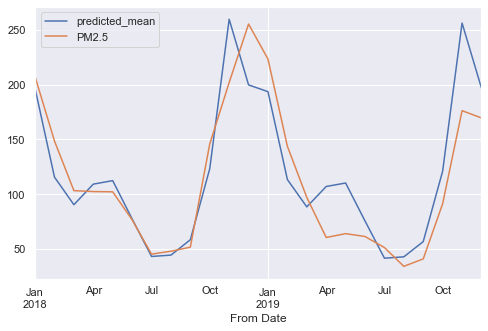

In [60]:
pred = results.predict(start = start, end= end, dynamic= True) 
plt.figure(figsize=(8,5))
pred.plot(legend=True)
feature_test.plot(legend=True)
plt.show()

In [61]:
forecast_accuracy(feature_test, pred)

<ipython-input-55-37f628ba3fee>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
<ipython-input-55-37f628ba3fee>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-55-37f628ba3fee>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],
<ipython-input-55-37f628ba3fee>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[

{'mape': 0.1889359822213016,
 'me': -5.496172557155124,
 'mae': 23.6993176224606,
 'mpe': -0.03732714277202423,
 'rmse': 31.149054065230388,
 'corr': 0.8851988222114205,
 'minmax': 0.1760567093929889}

In [62]:
PM25comp = pd.read_excel (r'D:\Downloads\PM25comp.xlsx')


In [65]:
pred=list(pred)

In [66]:
PM25comp['SARIMA']=pred

In [67]:
PM25comp

,Prophet_pred,True,SARIMA
0,226.357018,223.311935,196.499600
1,104.292329,143.792857,115.664274
2,79.137426,97.162419,90.508976
3,81.861031,60.641333,109.268341
4,106.701778,64.126774,112.459114
5,81.636034,61.534000,77.546600
6,44.784271,51.434839,43.318277
7,43.218479,34.308387,44.546004
8,50.015716,41.096000,58.578187
9,99.327277,91.420000,123.438526


In [68]:
PM25comp.to_excel("PM25comp.xlsx") 

# PM10

In [62]:
feature_train_PM10=df_month.loc['2013-01-01':'2017-12-31','PM1']
feature_test_PM10=df_month.loc['2018-01-01':'2019-12-31','PM1']

In [63]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

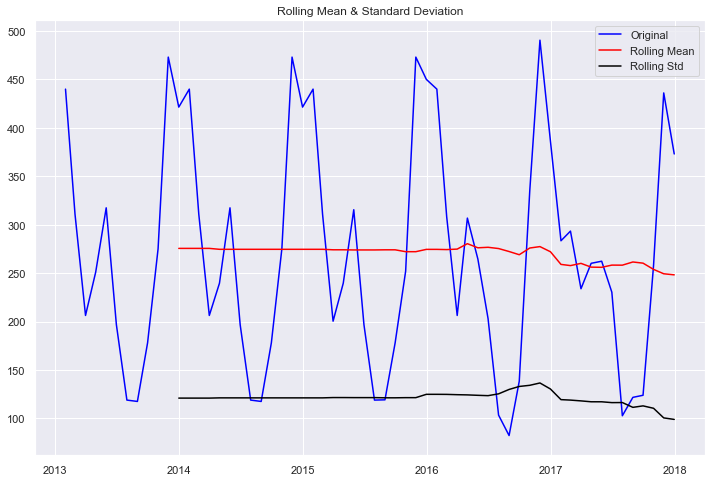

Results of Dickey-Fuller Test:
Test Statistic                  0.073213
p-value                         0.964184
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


In [64]:
test_stationarity(feature_train_PM10)

C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


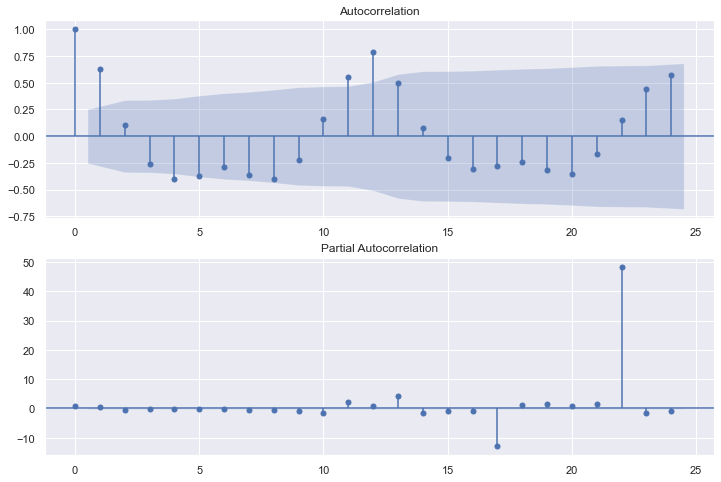

In [65]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(feature_train_PM10, lags=24, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(feature_train_PM10, lags=24, ax=ax2)

In [67]:
start=len(feature_train_PM10)
end=len(feature_train_PM10)+len(feature_test_PM10)-1

In [68]:
rmse_val=100000
for param in pdq:
    param_seasonal_list=list(param)
    param_seasonal_list.append(12)
    param_seasonal=tuple(param_seasonal_list)
    mod = sm.tsa.statespace.SARIMAX(feature_train_PM10,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
    results = mod.fit()
    pred = results.predict(start = start, end= end, dynamic= True)
    rmse = np.mean((pred - feature_test_PM10)**2)**.5
    if rmse<rmse_val:
        rmse_val=rmse
        orde=param
        sorde=param_seasonal
    #print("Sarimax",param," ",param_seasonal," ",results.aic," ",rmse)
print(orde,rmse_val)

C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kira\anaconda3\lib\site-pa

(1, 0, 3) 34.40063077308122


In [69]:
mod = sm.tsa.statespace.SARIMAX(feature_train_PM10, trend='n', order=orde, seasonal_order=sorde)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                PM1   No. Observations:                   60
Model:             SARIMAX(1, 0, 3)x(1, 0, 3, 12)   Log Likelihood                -323.847
Date:                            Sun, 20 Jun 2021   AIC                            665.695
Time:                                    05:00:19   BIC                            684.544
Sample:                                01-31-2013   HQIC                           673.067
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9992      0.308      3.241      0.001       0.395       1.603
ma.L1         -0.1445      0.248   

C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


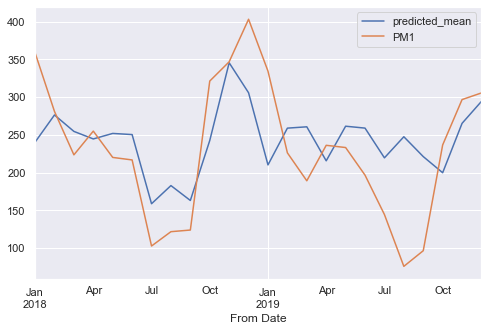

In [70]:
pred = results.predict(start = start, end= end, dynamic= True) 
plt.figure(figsize=(8,5))
pred.plot(legend=True)
feature_test_PM10.plot(legend=True)
plt.show()

# NO

In [71]:
feature_train_NO=df_month.loc['2013-01-01':'2017-12-31','NO']
feature_test_NO=df_month.loc['2018-01-01':'2019-12-31','NO']

In [72]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

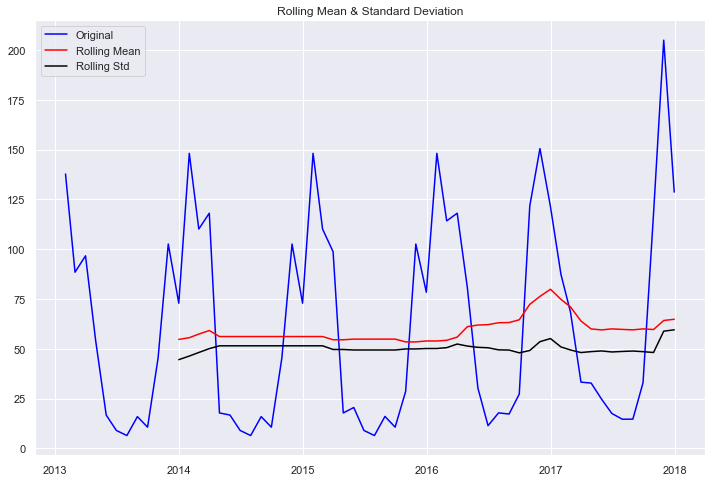

Results of Dickey-Fuller Test:
Test Statistic                 -1.453630
p-value                         0.556312
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


In [73]:
test_stationarity(feature_train_NO)

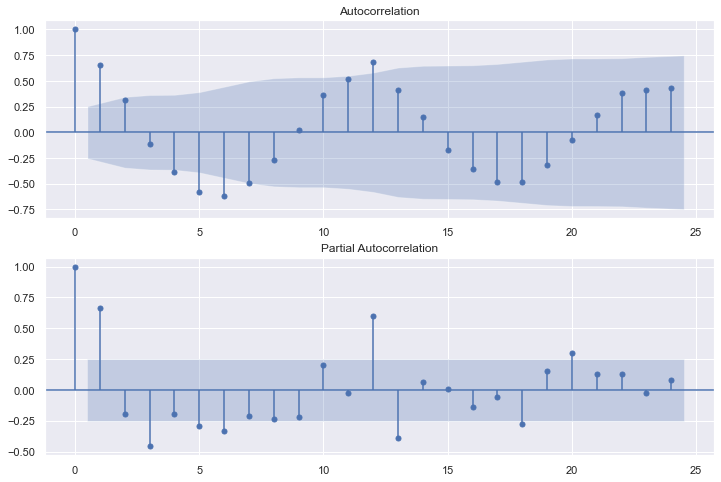

In [74]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(feature_train_NO, lags=24, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(feature_train_NO, lags=24, ax=ax2)

In [75]:
start=len(feature_train_NO)
end=len(feature_train_NO)+len(feature_test_NO)-1

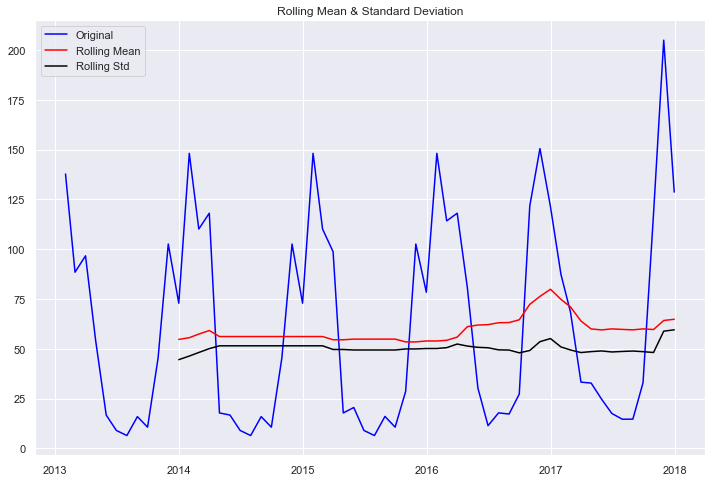

Results of Dickey-Fuller Test:
Test Statistic                 -1.453630
p-value                         0.556312
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


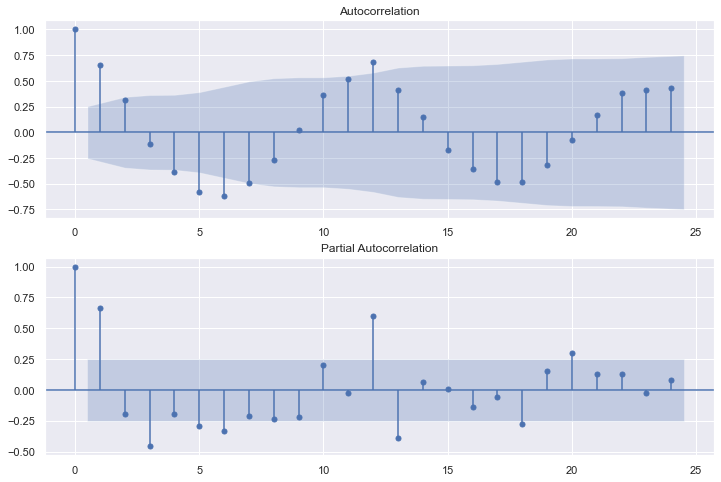

In [76]:
feature_train_NO=df_month.loc['2013-01-01':'2017-12-31','NO']
feature_test_NO=df_month.loc['2018-01-01':'2019-12-31','NO']

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(feature_train_NO)

import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(feature_train_NO, lags=24, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(feature_train_NO, lags=24, ax=ax2)

start=len(feature_train_NO)
end=len(feature_train_NO)+len(feature_test_NO)-1

In [77]:
rmse_val=100000
for param in pdq:
    param_seasonal_list=list(param)
    param_seasonal_list.append(12)
    param_seasonal=tuple(param_seasonal_list)
    mod = sm.tsa.statespace.SARIMAX(feature_train_NO,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
    results = mod.fit()
    pred = results.predict(start = start, end= end, dynamic= True)
    rmse = np.mean((pred - feature_test_NO)**2)**.5
    if rmse<rmse_val:
        rmse_val=rmse
        orde=param
        sorde=param_seasonal
    #print("Sarimax",param," ",param_seasonal," ",results.aic," ",rmse)
print(orde,rmse_val)

C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kira\anaconda3\lib\site-pa

(2, 0, 0) 30.248462237147468


In [78]:
mod = sm.tsa.statespace.SARIMAX(feature_train_NO, trend='n', order=orde, seasonal_order=sorde)
results = mod.fit()
print(results.summary())

C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                                     SARIMAX Results                                      
Dep. Variable:                                 NO   No. Observations:                   60
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 12)   Log Likelihood                -283.948
Date:                            Sun, 20 Jun 2021   AIC                            577.896
Time:                                    05:01:14   BIC                            588.368
Sample:                                01-31-2013   HQIC                           581.992
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6419      0.195      3.300      0.001       0.261       1.023
ar.L2          0.0301      0.212   

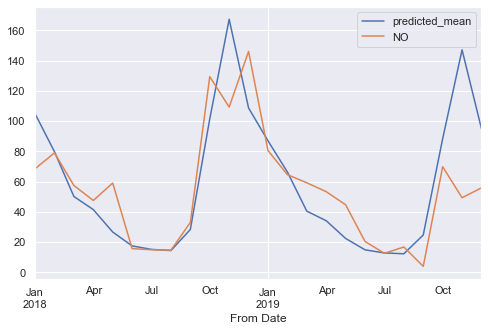

In [79]:
pred = results.predict(start = start, end= end, dynamic= True) 
plt.figure(figsize=(8,5))
pred.plot(legend=True)
feature_test_NO.plot(legend=True)
plt.show()

In [80]:
forecast_accuracy(feature_test_NO, pred)

<ipython-input-55-37f628ba3fee>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
<ipython-input-55-37f628ba3fee>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-55-37f628ba3fee>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],
<ipython-input-55-37f628ba3fee>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[

{'mape': 0.3386411776917237,
 'me': -3.978991040181992,
 'mae': 19.488430695884066,
 'mpe': 0.08308050762922821,
 'rmse': 29.710670746405683,
 'corr': 0.7490686888311251,
 'minmax': 0.2588351795401854}

# NO2

In [81]:
feature_train_NO2=df_month.loc['2013-01-01':'2017-12-31','NO2']
feature_test_NO2=df_month.loc['2018-01-01':'2019-12-31','NO2']

In [82]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

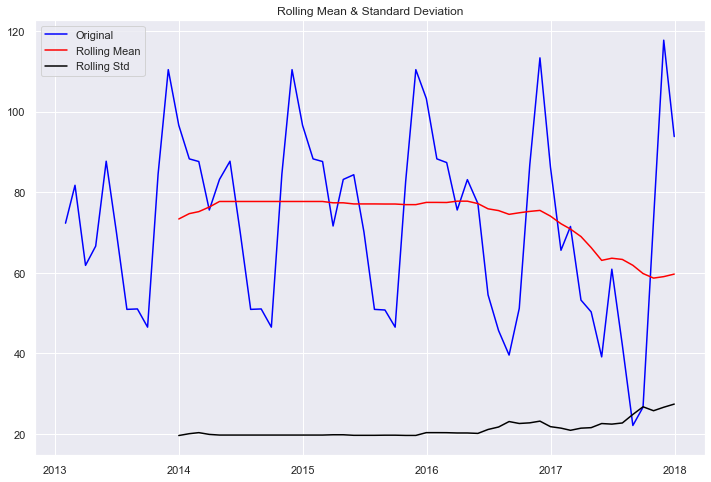

Results of Dickey-Fuller Test:
Test Statistic                  1.576113
p-value                         0.997784
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


In [83]:
test_stationarity(feature_train_NO2)

C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


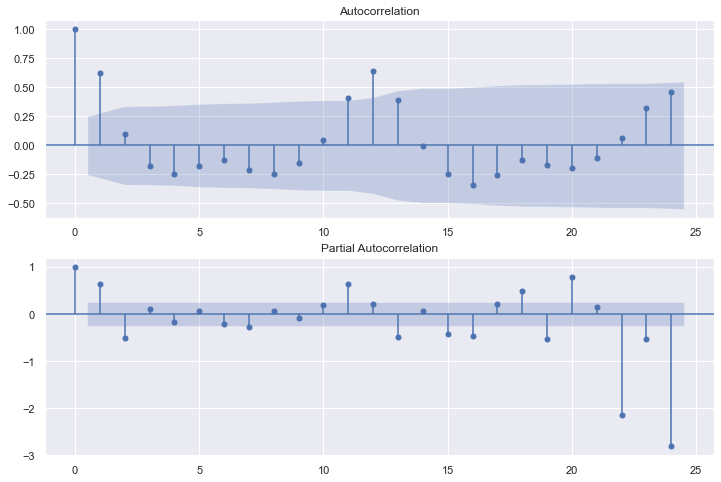

In [84]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(feature_train_NO2, lags=24, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(feature_train_NO2, lags=24, ax=ax2)

In [85]:
start=len(feature_train_NO2)
end=len(feature_train_NO2)+len(feature_test_NO2)-1

In [86]:
rmse_val=100000
for param in pdq:
    param_seasonal_list=list(param)
    param_seasonal_list.append(12)
    param_seasonal=tuple(param_seasonal_list)
    mod = sm.tsa.statespace.SARIMAX(feature_train_NO2,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
    results = mod.fit()
    pred = results.predict(start = start, end= end, dynamic= True)
    rmse = np.mean((pred - feature_test_NO2)**2)**.5
    if rmse<rmse_val:
        rmse_val=rmse
        orde=param
        sorde=param_seasonal
    #print("Sarimax",param," ",param_seasonal," ",results.aic," ",rmse)
print(orde,rmse_val)

C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kira\anaconda3\lib\site-pa

(2, 0, 1) 21.02823053769908


In [87]:
mod = sm.tsa.statespace.SARIMAX(feature_train_NO2, trend='n', order=orde, seasonal_order=sorde)
results = mod.fit()
print(results.summary())

C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                                NO2   No. Observations:                   60
Model:             SARIMAX(2, 0, 1)x(2, 0, 1, 12)   Log Likelihood                -225.408
Date:                            Sun, 20 Jun 2021   AIC                            464.816
Time:                                    05:02:04   BIC                            479.477
Sample:                                01-31-2013   HQIC                           470.551
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5548      0.198      7.866      0.000       1.167       1.942
ar.L2         -0.5622      0.186   

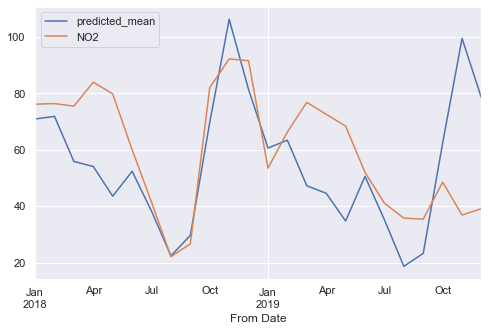

In [88]:
pred = results.predict(start = start, end= end, dynamic= True) 
plt.figure(figsize=(8,5))
pred.plot(legend=True)
feature_test_NO2.plot(legend=True)
plt.show()

In [89]:
forecast_accuracy(feature_test_NO2, pred)

<ipython-input-55-37f628ba3fee>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
<ipython-input-55-37f628ba3fee>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-55-37f628ba3fee>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],
<ipython-input-55-37f628ba3fee>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[

{'mape': 0.3342520100218047,
 'me': 4.96930101888282,
 'mae': 16.649822165177294,
 'mpe': 0.1911039075069355,
 'rmse': 22.487824368809154,
 'corr': 0.49140857391796094,
 'minmax': 0.2366450918638039}

# NOx

In [90]:
feature_train_NOx=df_month.loc['2013-01-01':'2017-12-31','NOx']
feature_test_NOx=df_month.loc['2018-01-01':'2019-12-31','NOx']

In [91]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

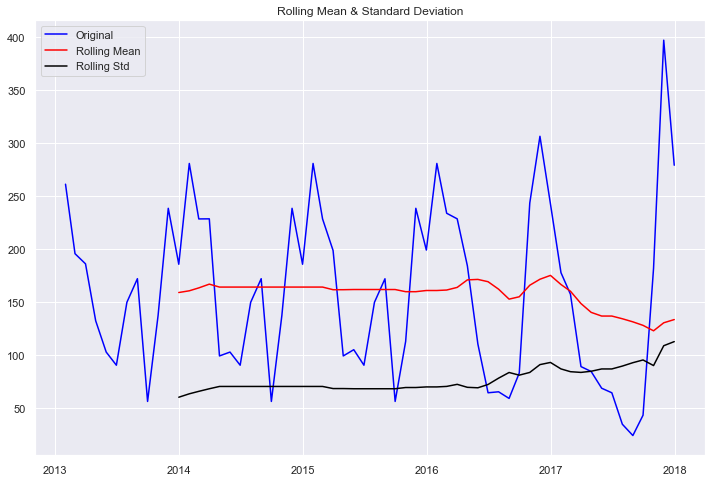

Results of Dickey-Fuller Test:
Test Statistic                  0.087973
p-value                         0.965230
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


In [92]:
test_stationarity(feature_train_NOx)

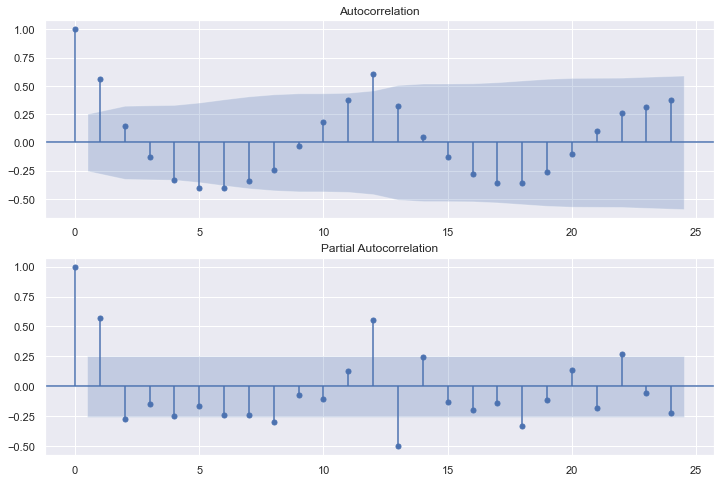

In [93]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(feature_train_NOx, lags=24, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(feature_train_NOx, lags=24, ax=ax2)

In [94]:
start=len(feature_train_NOx)
end=len(feature_train_NOx)+len(feature_test_NOx)-1

In [95]:
rmse_val=100000
for param in pdq:
    param_seasonal_list=list(param)
    param_seasonal_list.append(12)
    param_seasonal=tuple(param_seasonal_list)
    mod = sm.tsa.statespace.SARIMAX(feature_train_NOx,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
    results = mod.fit()
    pred = results.predict(start = start, end= end, dynamic= True)
    rmse = np.mean((pred - feature_test_NOx)**2)**.5
    if rmse<rmse_val:
        rmse_val=rmse
        orde=param
        sorde=param_seasonal
    #print("Sarimax",param," ",param_seasonal," ",results.aic," ",rmse)
print(orde,rmse_val)

C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kira\anaconda3\lib\site-pa

(0, 0, 2) 58.16251931624179


In [96]:
mod = sm.tsa.statespace.SARIMAX(feature_train_NOx, trend='n', order=(0,0,2), seasonal_order=(0,0,2,12))
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                NOx   No. Observations:                   60
Model:             SARIMAX(0, 0, 2)x(0, 0, 2, 12)   Log Likelihood                -330.431
Date:                            Sun, 20 Jun 2021   AIC                            670.863
Time:                                    05:02:58   BIC                            681.334
Sample:                                01-31-2013   HQIC                           674.959
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9461      0.136      6.963      0.000       0.680       1.212
ma.L2          0.4105      0.147   

C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


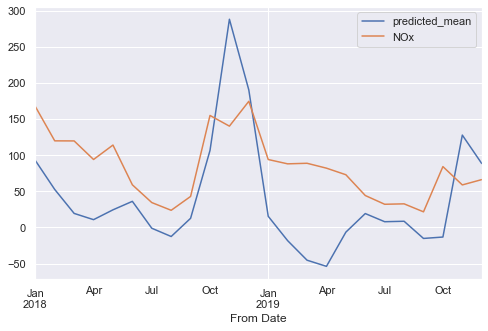

In [97]:
pred = results.predict(start = start, end= end, dynamic= True) 
plt.figure(figsize=(8,5))
pred.plot(legend=True)
feature_test_NOx.plot(legend=True)
plt.show()

In [98]:
forecast_accuracy(feature_test_NOx, pred)

<ipython-input-55-37f628ba3fee>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
<ipython-input-55-37f628ba3fee>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-55-37f628ba3fee>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],
<ipython-input-55-37f628ba3fee>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[

{'mape': 4.316663606896618,
 'me': 44.866786785224484,
 'mae': 66.12330907106308,
 'mpe': -1.4455510428268665,
 'rmse': 76.94160954977211,
 'corr': 0.5712356452370543,
 'minmax': 0.8373281229450185}

# NH3

In [99]:
feature_train_NH3=df_month.loc['2013-01-01':'2017-12-31','NH3']
feature_test_NH3=df_month.loc['2018-01-01':'2019-12-31','NH3']

In [100]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

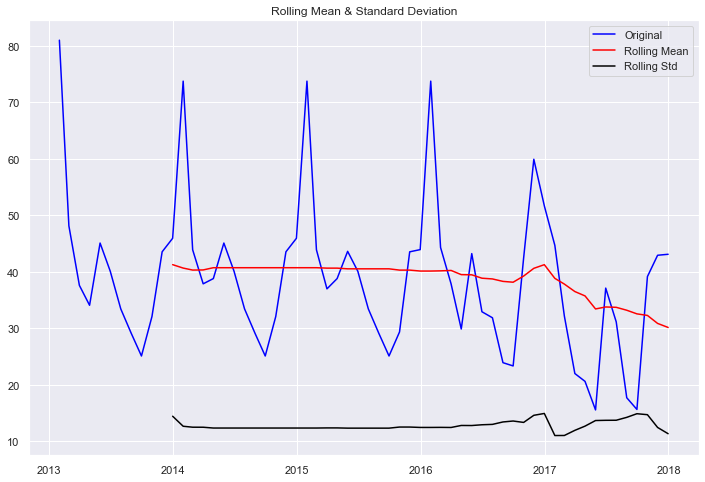

Results of Dickey-Fuller Test:
Test Statistic                  2.322273
p-value                         0.998969
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


In [101]:
test_stationarity(feature_train_NH3)

In [102]:
start=len(feature_train_NOx)
end=len(feature_train_NOx)+len(feature_test_NOx)-1

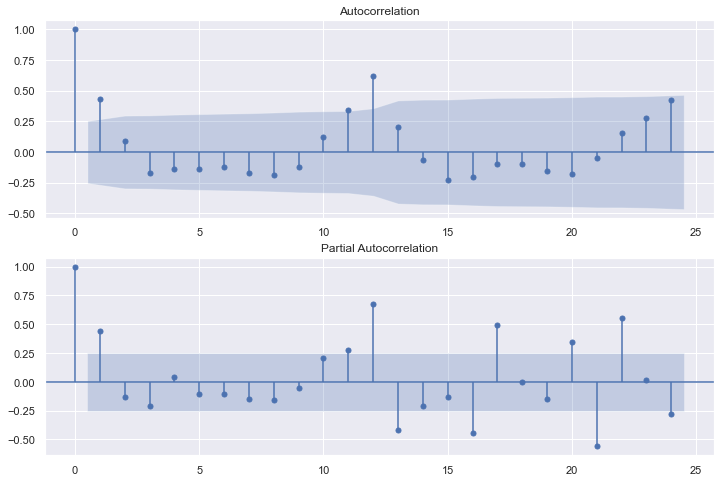

In [103]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(feature_train_NH3, lags=24, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(feature_train_NH3, lags=24, ax=ax2)

In [104]:
rmse_val=100000
for param in pdq:
    param_seasonal_list=list(param)
    param_seasonal_list.append(12)
    param_seasonal=tuple(param_seasonal_list)
    mod = sm.tsa.statespace.SARIMAX(feature_train_NH3,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
    results = mod.fit()
    pred = results.predict(start = start, end= end, dynamic= True)
    rmse = np.mean((pred - feature_test_NH3)**2)**.5
    if rmse<rmse_val:
        rmse_val=rmse
        orde=param
        sorde=param_seasonal
    #print("Sarimax",param," ",param_seasonal," ",results.aic," ",rmse)
print(orde,rmse_val)

C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kira\anaconda3\lib\site-pa

(1, 0, 3) 8.466044922622437


In [105]:
mod = sm.tsa.statespace.SARIMAX(feature_train_NH3, trend='n', order=(1, 0, 3), seasonal_order=(1, 0, 3,12))
results = mod.fit()
print(results.summary())

C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                                     SARIMAX Results                                      
Dep. Variable:                                NH3   No. Observations:                   60
Model:             SARIMAX(1, 0, 3)x(1, 0, 3, 12)   Log Likelihood                -210.375
Date:                            Sun, 20 Jun 2021   AIC                            438.751
Time:                                    05:03:48   BIC                            457.600
Sample:                                01-31-2013   HQIC                           446.124
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9966      0.006    172.778      0.000       0.985       1.008
ma.L1         -0.4717      0.133   

C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


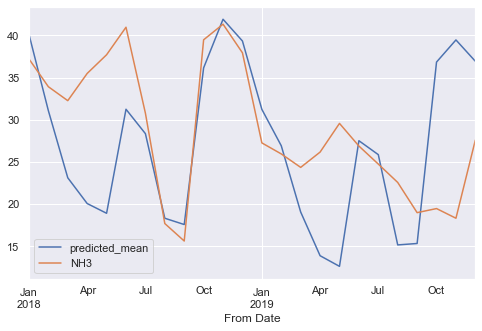

In [106]:
pred = results.predict(start = start, end= end, dynamic= True) 
plt.figure(figsize=(8,5))
pred.plot(legend=True)
feature_test_NH3.plot(legend=True)
plt.show()

In [107]:
forecast_accuracy(feature_test_NH3, pred)

<ipython-input-55-37f628ba3fee>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
<ipython-input-55-37f628ba3fee>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-55-37f628ba3fee>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],
<ipython-input-55-37f628ba3fee>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[

{'mape': 0.3218395241009875,
 'me': 1.8844397251805678,
 'mae': 7.05328589700123,
 'mpe': 0.17543489067062776,
 'rmse': 9.568764289615414,
 'corr': 0.39868892671135914,
 'minmax': 0.2182127666116228}

# SO2

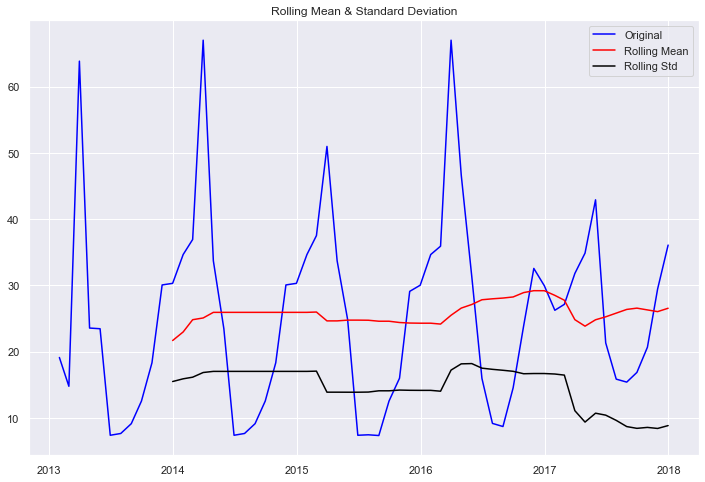

Results of Dickey-Fuller Test:
Test Statistic                 -2.437238
p-value                         0.131501
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


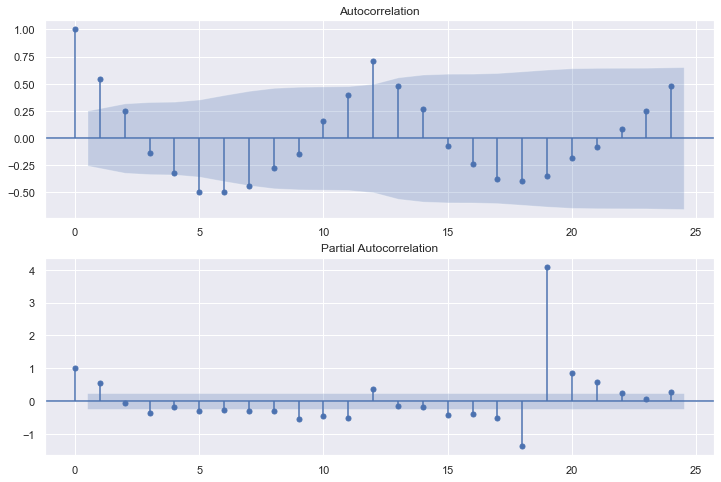

In [108]:
feature_train_SO2=df_month.loc['2013-01-01':'2017-12-31','SO2']
feature_test_SO2=df_month.loc['2018-01-01':'2019-12-31','SO2']

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(feature_train_SO2)

import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(feature_train_SO2, lags=24, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(feature_train_SO2, lags=24, ax=ax2)

start=len(feature_train_SO2)
end=len(feature_train_SO2)+len(feature_test_SO2)-1

In [109]:
rmse_val=100000
for param in pdq:
    param_seasonal_list=list(param)
    param_seasonal_list.append(12)
    param_seasonal=tuple(param_seasonal_list)
    mod = sm.tsa.statespace.SARIMAX(feature_train_SO2,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
    results = mod.fit()
    pred = results.predict(start = start, end= end, dynamic= True)
    rmse = np.mean((pred - feature_test_SO2)**2)**.5
    if rmse<rmse_val:
        rmse_val=rmse
        orde=param
        sorde=param_seasonal
    #print("Sarimax",param," ",param_seasonal," ",results.aic," ",rmse)
print(orde,rmse_val)

C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kira\anaconda3\lib\site-pa

(1, 0, 3) 4.64403785502226


In [110]:
mod = sm.tsa.statespace.SARIMAX(feature_train_SO2, trend='n', order=orde, seasonal_order=sorde)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                SO2   No. Observations:                   60
Model:             SARIMAX(1, 0, 3)x(1, 0, 3, 12)   Log Likelihood                -209.315
Date:                            Sun, 20 Jun 2021   AIC                            436.629
Time:                                    05:04:42   BIC                            455.478
Sample:                                01-31-2013   HQIC                           444.002
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      0.005    182.117      0.000       0.989       1.011
ma.L1         -0.4911      0.180   

C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


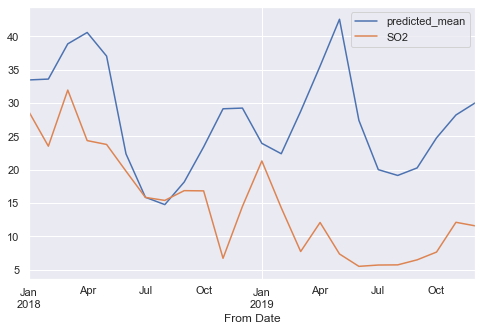

In [111]:
pred = results.predict(start = start, end= end, dynamic= True) 
plt.figure(figsize=(8,5))
pred.plot(legend=True)
feature_test_SO2.plot(legend=True)
plt.show()

In [112]:
forecast_accuracy(feature_test_SO2, pred)

<ipython-input-55-37f628ba3fee>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
<ipython-input-55-37f628ba3fee>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-55-37f628ba3fee>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],
<ipython-input-55-37f628ba3fee>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[

{'mape': 0.4425404217411755,
 'me': -12.650565591934212,
 'mae': 12.703001002099619,
 'mpe': -0.4389905562283265,
 'rmse': 15.312648097600023,
 'corr': 0.3615475717696322,
 'minmax': 0.44246790170665407}

In [113]:
feature_train_CO=df_month.loc['2013-01-01':'2017-12-31','CO']
feature_test_CO=df_month.loc['2018-01-01':'2019-12-31','CO']

In [114]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

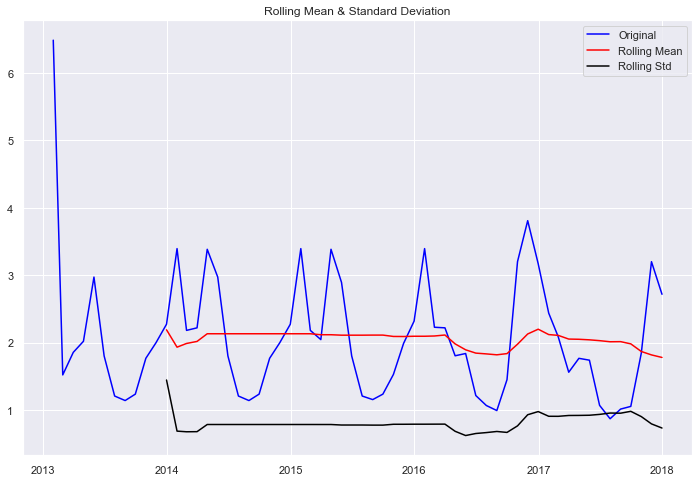

Results of Dickey-Fuller Test:
Test Statistic                 -0.923098
p-value                         0.780271
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


In [115]:
test_stationarity(feature_train_CO)

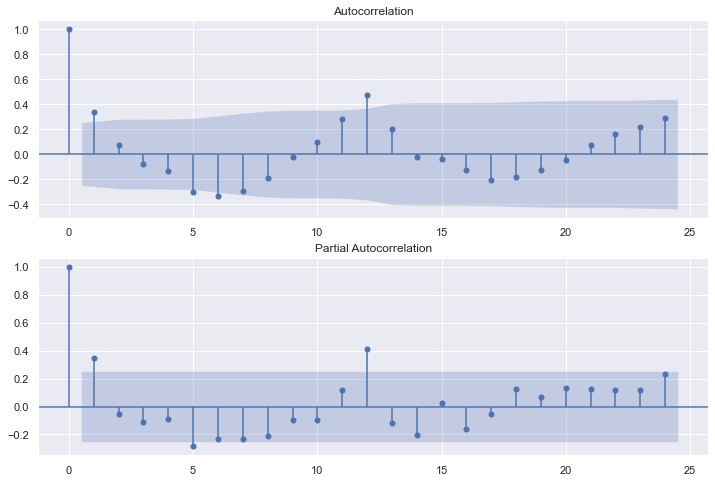

In [116]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(feature_train_CO, lags=24, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(feature_train_CO, lags=24, ax=ax2)

In [117]:
start=len(feature_train_CO)
end=len(feature_train_CO)+len(feature_test_CO)-1

In [118]:
rmse_val=100000
for param in pdq:
    param_seasonal_list=list(param)
    param_seasonal_list.append(12)
    param_seasonal=tuple(param_seasonal_list)
    mod = sm.tsa.statespace.SARIMAX(feature_train_CO,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
    results = mod.fit()
    pred = results.predict(start = start, end= end, dynamic= True)
    rmse = np.mean((pred - feature_test_CO)**2)**.5
    if rmse<rmse_val:
        rmse_val=rmse
        orde=param
        sorde=param_seasonal
    #print("Sarimax",param," ",param_seasonal," ",results.aic," ",rmse)
print(orde,rmse_val)

C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kira\anaconda3\lib\site-pa

(1, 0, 3) 0.4018807527568568


In [119]:
mod = sm.tsa.statespace.SARIMAX(feature_train_CO, trend='n', order=orde, seasonal_order=sorde)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                 CO   No. Observations:                   60
Model:             SARIMAX(1, 0, 3)x(1, 0, 3, 12)   Log Likelihood                 -64.621
Date:                            Sun, 20 Jun 2021   AIC                            147.242
Time:                                    05:05:53   BIC                            166.091
Sample:                                01-31-2013   HQIC                           154.615
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.005    198.444      0.000       0.990       1.010
ma.L1         -0.3679      0.183   

C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


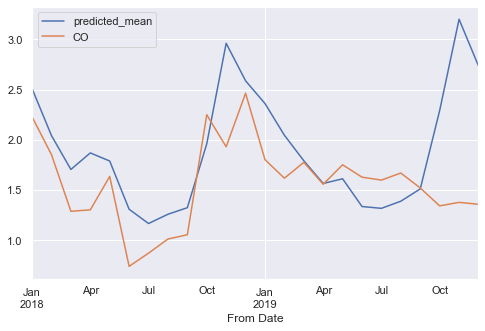

In [120]:
pred = results.predict(start = start, end= end, dynamic= True) 
plt.figure(figsize=(8,5))
pred.plot(legend=True)
feature_test_CO.plot(legend=True)
plt.show()

In [121]:
forecast_accuracy(feature_test_CO, pred)

<ipython-input-55-37f628ba3fee>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
<ipython-input-55-37f628ba3fee>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-55-37f628ba3fee>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],
<ipython-input-55-37f628ba3fee>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[

{'mape': 0.21435817450501812,
 'me': -0.3339308073356874,
 'mae': 0.44170374571924853,
 'mpe': -0.14143329518084014,
 'rmse': 0.6201327305786218,
 'corr': 0.4690369840256617,
 'minmax': 0.20865661820893544}

# Ozone

In [122]:
feature_train_Ozone=df_month.loc['2013-01-01':'2017-12-31','Ozone']
feature_test_Ozone=df_month.loc['2018-01-01':'2019-12-31','Ozone']

In [123]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

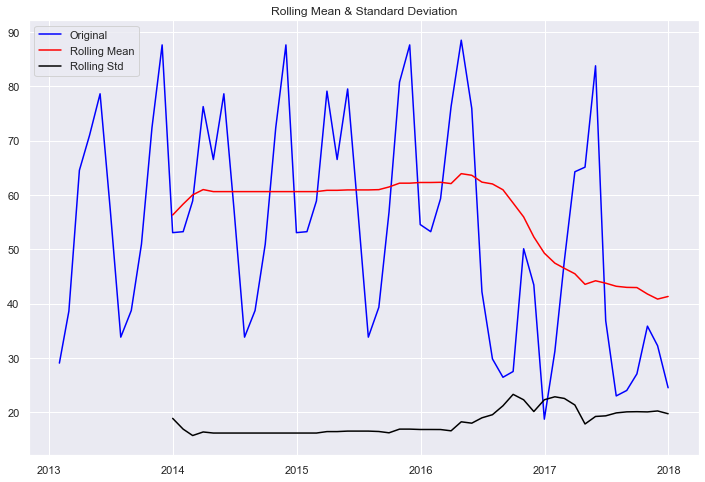

Results of Dickey-Fuller Test:
Test Statistic                  0.837338
p-value                         0.992216
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


In [124]:
test_stationarity(feature_train_Ozone)

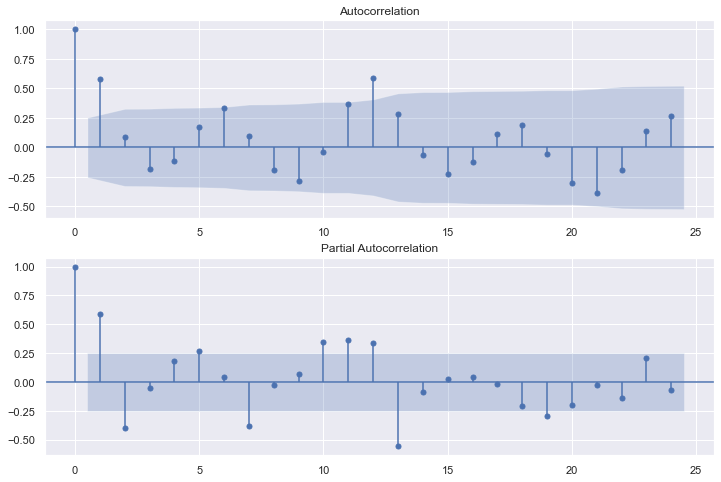

In [125]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(feature_train_Ozone, lags=24, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(feature_train_Ozone, lags=24, ax=ax2)

In [126]:
start=len(feature_train_Ozone)
end=len(feature_train_Ozone)+len(feature_test_Ozone)-1

In [127]:
rmse_val=100000
for param in pdq:
    param_seasonal_list=list(param)
    param_seasonal_list.append(12)
    param_seasonal=tuple(param_seasonal_list)
    mod = sm.tsa.statespace.SARIMAX(feature_train_Ozone,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
    results = mod.fit()
    pred = results.predict(start = start, end= end, dynamic= True)
    rmse = np.mean((pred - feature_test_Ozone)**2)**.5
    if rmse<rmse_val:
        rmse_val=rmse
        orde=param
        sorde=param_seasonal
    #print("Sarimax",param," ",param_seasonal," ",results.aic," ",rmse)
print(orde,rmse_val)

C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kira\anaconda3\lib\site-pa

(2, 0, 2) 11.874070278334283


In [128]:
mod = sm.tsa.statespace.SARIMAX(feature_train_Ozone, trend='n', order=orde, seasonal_order=sorde)
results = mod.fit()
print(results.summary())

C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                              Ozone   No. Observations:                   60
Model:             SARIMAX(2, 0, 2)x(2, 0, 2, 12)   Log Likelihood                -224.755
Date:                            Sun, 20 Jun 2021   AIC                            467.511
Time:                                    05:06:45   BIC                            486.360
Sample:                                01-31-2013   HQIC                           474.884
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4708      0.532      2.766      0.006       0.428       2.513
ar.L2         -0.4893      0.491   

C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


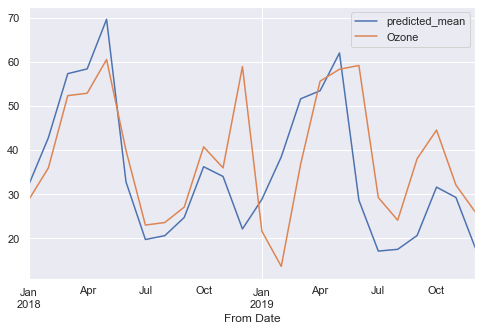

In [129]:
pred = results.predict(start = start, end= end, dynamic= True) 
plt.figure(figsize=(8,5))
pred.plot(legend=True)
feature_test_Ozone.plot(legend=True)
plt.show()

In [130]:
forecast_accuracy(feature_test_Ozone, pred)

<ipython-input-55-37f628ba3fee>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
<ipython-input-55-37f628ba3fee>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-55-37f628ba3fee>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],
<ipython-input-55-37f628ba3fee>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[

{'mape': 0.34459004890103956,
 'me': 2.969483231562512,
 'mae': 9.65740560447248,
 'mpe': 0.19318394283513887,
 'rmse': 13.248514066787735,
 'corr': 0.6099585627153273,
 'minmax': 0.2303447371255697}